<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de PSO

## Clasificación usando regresión logística optimizada por un pso.

La regresión logística es un algoritmo de aprendizaje automático que se utiliza para hacer predicciones para encontrar el valor de una variable dependiente, como la predecir si un tumor es maligno o benigno, la clasificación del correo electrónico (spam o no spam) o la admisión a una universidad (admitido o no admitido), este algoritmo va aprendiendo de variables independientes (varias características relevantes para el problema).

Por ejemplo, para clasificar un correo electrónico, el algoritmo utilizará las palabras del correo electrónico como características y, en función de eso, hará una predicción de si el correo electrónico es spam o no.

In [1]:
# import pandas as pd
# social = pd.read_csv('Data/Social_Network_Ads.csv')

### Codificando

In [2]:
import numpy as np
import pandas as pd

In [3]:
marks_df = pd.read_csv('Data/exdata1.csv')
marks_df

,0,1,2
0,0.131117,-0.694103,0.0
1,0.567389,0.339034,0.0
2,2.855025,2.971203,1.0
3,0.541739,0.560591,0.0
4,0.073822,-0.335345,0.0
...,...,...,...
195,2.838675,2.946874,1.0
196,0.479348,0.361812,0.0
197,2.032113,3.419321,1.0
198,3.537026,3.091923,1.0


In [4]:
# X = feature values, all the columns except the last column
X = marks_df.iloc[:, :-1]

# y = target values, last column of the data frame
y = marks_df.iloc[:, -1]


In [5]:
X

,0,1
0,0.131117,-0.694103
1,0.567389,0.339034
2,2.855025,2.971203
3,0.541739,0.560591
4,0.073822,-0.335345
...,...,...
195,2.838675,2.946874
196,0.479348,0.361812
197,2.032113,3.419321
198,3.537026,3.091923


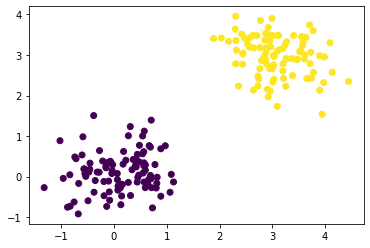

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c=y)

Una regresión Linea puede representarse como:

$$\hat{f}(x) = \beta^T X$$

Aplicando la función sigmoide a la salida de la regresión logística:

$$\hat{f}(x) = \sigma(\beta^T X)$$

Donde la función sigmoide está definida como:

$$\sigma(t) = \frac{1}{1+e^{-t}}$$

Entonces el modelo de regresión logística nos queda:

$$\hat{f}(x) = \frac{1}{1+e^{-\beta^T X}}$$


Si la suma ponderada de las entradas es mayor que cero, la clase predicha es 1 y viceversa. Entonces, el límite de decisión que separa ambas clases se puede encontrar al establecer la suma ponderada de las entradas en 0.

$$
\hat{f}(\textbf{x}) = \begin{cases}  \textrm{>0.5, si  }  \beta^T X \geq 0 \\ \\  \textrm{<0.5, si  } \beta^T X \leq 0\\ \end{cases}
$$

#### Función de costo

Al igual que la regresión lineal, se define una función de costo para nuestro modelo y el objetivo será minimizar el costo.

$$
cost = \begin{cases}  -\log{\hat{f}(x)}, \textrm{si  }  y=1 \\ \\  -\log{(1 - \hat{f}(x)}), \textrm{si  }  y=0 \\ \end{cases}
$$

#### Intuición de la función de costo

Si la clase de los datos reales es 1 y el modelo predice 0, deberíamos penalizar al modelo y viceversa. Como se puede ver en la figura de abajo, para la gráfica $-\log(\hat{f}(x))$ cuando $\hat{f}(x)$ se acerca a 1, el costo es 0 y cuando h(x) se acerca a 0, el costo es infinito (es decir, penalizamos fuertemente el modelo). De manera similar, para la gráfica $-\log(1-\hat{f}(x))$ cuando el valor real es 0 y el modelo predice 0, el costo es 0 y el costo se vuelve infinito cuando $\hat{f}(x)$ se acerca a 1.

<img style="float: center;;" src='Figures/log_reg.png' width="400" height="100"/></a>

In [7]:
# x_num = np.linspace(-1,1)
# X_num=np.concatenate((np.ones((len(x_num),1)),x_num.reshape(len(x_num),1)),axis=1)
# beta=np.array([0, 10])

# def sigmoid_fun(x, beta):
#     return 1/(1+np.exp(x.dot(beta)))

# f_hat = sigmoid_fun(X_num, beta)
# plt.figure(figsize=(6,4))
# plt.plot(x_num, -np.log(f_hat), c='b')
# plt.plot(x_num, -np.log(1-f_hat), c='g')
# plt.grid()
# plt.xlabel('$\hat{f}(x)$')
# plt.ylabel('$cost$')
# plt.show()

Combinando las dos ecuaciones tenemos:

$$cost(\hat{f}(x),y) = -y\log(\hat{f}(x)) - (1-y)\log(1-\hat{f}(x))$$

Entonces el costo de todos los puntos en los datos reales se puede calcular tomando el promedio del costo de todas las muestras:

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{f}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{f}(x^{(i)}))]$$

In [8]:
def sigmoid(X):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-X))

In [9]:
def regresor(beta, X):
    # Computes the weighted sum of inputs
    return np.dot(X, beta)


In [10]:
def f_hat_model(beta, X):
    # Returns the probability after passing through sigmoid
    return sigmoid(regresor(beta, X))

In [11]:
def cost_function(beta, X, y):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
    return cost

In [12]:
def predict(Beta,X):
    return f_hat_model(Beta,X)

In [13]:
def gradient(beta, X, y):
    # Computes the gradient of the cost function at the point theta
    m = X.shape[0]
    return (1 / m) * np.dot(X.T, sigmoid(regresor(beta,   X)) - y)

In [14]:
def accuracy(X, y, Beta, probab_threshold=0.5):
    predicted_classes = (predict(Beta,X) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == y)
    return accuracy * 100

In [15]:
Xa = np.c_[np.ones((X.shape[0], 1)), X]
y = y.values.reshape(len(y),1)
#y = y[:, np.newaxis]
Beta = np.zeros((Xa.shape[1], 1))

In [16]:
import scipy.optimize as opt
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize.tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arra

In [17]:
def fit(X, y, beta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=beta,
                  fprime=gradient,args=(X, y.flatten()))
    return opt_weights[0]

Beta_solution = fit(Xa, y, Beta)

<ipython-input-11-49d664546f14>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
<ipython-input-11-49d664546f14>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))


In [18]:
Beta_solution = fit(Xa, y, Beta)
Beta_solution

<ipython-input-11-49d664546f14>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
<ipython-input-11-49d664546f14>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))


array([-25.11316106,  10.64528041,   5.3689346 ])

In [19]:
accuracy = np.mean(np.round(predict(Beta_solution,Xa)) == y.T[0])
accuracy

1.0

Como hay dos características en nuestro conjunto de datos, la ecuación lineal se puede representar mediante:

$$\hat{f}(x)=\beta_0 + \beta_1 x_1 + \beta_2 x_2$$

El límite de decisión se puede encontrar estableciendo la suma ponderada de las entradas en 0. Es decir igualar $\hat{f}(x)=0$, entonces:

$$x_2 = - \frac{\beta_0 + \beta_1 x_1}{\beta_2}$$

0

$$x_1 = - \frac{\beta_0 + \beta_2 x_2}{\beta_1}$$

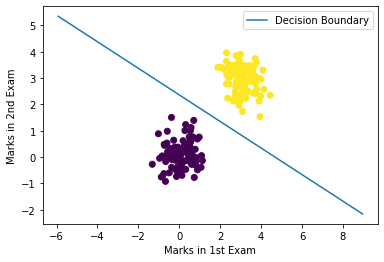

In [20]:
x_values = [np.min(Xa[:, 2] - 5), np.max(Xa[:, 2] + 5)]
y_values = - (Beta_solution[0] + np.dot(Beta_solution[2], x_values)) / Beta_solution[1]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### Sklearn

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression( fit_intercept=False)
model.fit(Xa, y.ravel())
predicted_classes = model.predict(Xa)
accuracy = accuracy_score(y.flatten(),predicted_classes)

parameters = model.coef_

In [22]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Text(0, 0.5, 'x2')

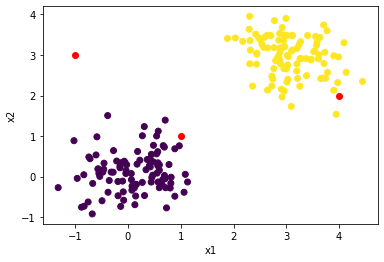

In [23]:
# Predecir datos nuevos (muestras nuevas)
X_new = np.array([[1,1,1],
                 [1,-1,3],
                 [1,4,2]])

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c=y)
plt.scatter(X_new[:,1],X_new[:,2], c='r')
plt.xlabel('x1')
plt.ylabel('x2')

In [24]:
yhat_predict = model.predict(X_new[:,:])
yhat_predict


array([0., 0., 1.])

In [25]:
accuracy

1.0

In [28]:
parameters=parameters[0]
parameters

array([-3.72950368,  1.44931094,  1.32200779])

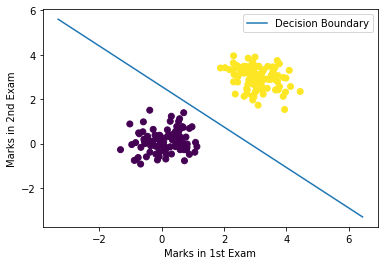

In [29]:
x_values = [np.min(Xa[:, 1] - 2), np.max(Xa[:, 1] + 2)]
y_values = - (parameters[0] + np.dot(parameters[2], x_values)) / parameters[1]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [30]:
model.coef_.T

array([[-3.72950368],
       [ 1.44931094],
       [ 1.32200779]])

## Aplicando PSO

In [37]:
def cost_function(beta, X, y):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
    return cost

In [38]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys # max float


#particle class
class Particle:
    def __init__(self, fitness, x_points, y_points, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)

        # initialize position of the particle with 0.0 value
        self.position = [0.0 for i in range(dim)]

        # initialize velocity of the particle with 0.0 value
        self.velocity = [0.0 for i in range(dim)]

        # initialize best particle position of the particle with 0.0 value
        self.best_part_pos = [0.0 for i in range(dim)]

        # loop dim times to calculate random position and velocity
        # range of position and velocity is [minx, max]
        for i in range(dim):
            self.position[i] = ((maxx - minx)*self.rnd.random() + minx)
            self.velocity[i] = ((maxx - minx)*self.rnd.random() + minx)

        # compute fitness of particle
        self.fitness = fitness(self.position,x_points, y_points) # curr fitness

        # initialize best position and fitness of this particle
        self.best_part_pos = copy.copy(self.position)
        self.best_part_fitnessVal = self.fitness # best fitness

    # particle swarm optimization function
    def pso(fitness, x_points, y_points, max_iter, n, dim, minx, maxx):
        # hyper parameters
        w = 3 # inertia
        c1 = 2.3 # cognitive (particle)
        c2 = 2.5 # social (swarm)

        rnd = random.Random(0)

        # create n random particles
        swarm = [Particle(fitness, x_points, y_points, dim, minx, maxx, i) for i in range(n)]

        # compute the value of best_position and best_fitness in swarm
        best_swarm_pos = [0.0 for i in range(dim)]
        best_swarm_fitnessVal = sys.float_info.max # swarm best

        # computer best particle of swarm and it's fitness
        for i in range(n): # check each particle
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)

        # main loop of pso
        Iter = 0
        best_swarm_pos_hist = {}
        best_swarm_fitnessVal_hist = {}
        
        while Iter < max_iter:

            # after every 10 iterations
            # print iteration number and best fitness value so far
            best_swarm_pos_hist[Iter] = best_swarm_pos
            best_swarm_fitnessVal_hist[Iter] = best_swarm_fitnessVal
            if Iter % 10 == 0 and Iter > 1:
                print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
                print(f'best_position: {best_swarm_pos}')

            for i in range(n): # process each particle

                # compute new velocity of curr particle
                for k in range(dim):
                    r1 = rnd.random() # randomizations
                    r2 = rnd.random()

                    swarm[i].velocity[k] = (
                                            (w * swarm[i].velocity[k]) +
                                            (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) +
                                            (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                                        )


                    # if velocity[k] is not in [minx, max]
                    # then clip it
                    if swarm[i].velocity[k] < minx:
                        swarm[i].velocity[k] = minx
                    elif swarm[i].velocity[k] > maxx:
                        swarm[i].velocity[k] = maxx


            # compute new position using new velocity
            for k in range(dim):
                swarm[i].position[k] += swarm[i].velocity[k]

            # compute fitness of new position
            swarm[i].fitness = fitness(swarm[i].position,x_points, y_points)

            # is new position a new best for the particle?
            if swarm[i].fitness < swarm[i].best_part_fitnessVal:
                swarm[i].best_part_fitnessVal = swarm[i].fitness
                swarm[i].best_part_pos = copy.copy(swarm[i].position)

            # is new position a new best overall?
            if swarm[i].fitness < best_swarm_fitnessVal:
                best_swarm_fitnessVal = swarm[i].fitness
                best_swarm_pos = copy.copy(swarm[i].position)

            # for-each particle
            Iter += 1
        #end_while
        return best_swarm_pos, best_swarm_pos_hist, best_swarm_fitnessVal_hist
        # end pso


#----------------------------



Begin particle swarm optimization on rastrigin function

Setting num_particles = 1000
Setting max_iter = 10000

Starting PSO algorithm

Iter = 10 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]


<ipython-input-37-49d664546f14>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
<ipython-input-37-49d664546f14>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1 / m) * np.sum(y * np.log(f_hat_model(beta, X)) + (1 - y) * np.log(1 - f_hat_model(beta, X)))
<ipython-input-8-3a3e8a91b583>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


Iter = 20 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 30 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 40 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 50 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 60 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 70 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 80 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 90 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 100 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 110 best fitness = 5

Iter = 820 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 830 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 840 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 850 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 860 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 870 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 880 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 890 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 900 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 910 best fit

Iter = 1630 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1640 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1650 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1660 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1670 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1680 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1690 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1700 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 1710 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 172

Iter = 2420 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2430 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2440 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2450 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2460 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2470 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2480 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2490 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 2500 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 251

Iter = 3210 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3220 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3230 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3240 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3250 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3260 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3270 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3280 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 3290 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 330

Iter = 4020 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4030 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4040 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4050 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4060 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4070 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4080 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4090 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4100 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 411

Iter = 4810 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4820 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4830 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4840 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4850 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4860 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4870 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4880 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 4890 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 490

Iter = 5590 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5600 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5610 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5620 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5630 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5640 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5650 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5660 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 5670 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 568

Iter = 6370 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6380 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6390 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6400 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6410 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6420 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6430 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6440 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 6450 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 646

Iter = 7120 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7130 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7140 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7150 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7160 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7170 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7180 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7190 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 7200 best fitness = 585.922
best_position: [8.149232606541482, 3.9245217240979926, -6.944905375338294]
Iter = 721

Iter = 7900 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7910 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7920 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7930 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7940 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7950 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7960 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7970 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 7980 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 799

Iter = 8660 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8670 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8680 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8690 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8700 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8710 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8720 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8730 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 8740 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 875

Iter = 9430 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9440 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9450 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9460 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9470 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9480 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9490 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9500 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 9510 best fitness = 385.139
best_position: [-5.2709165613223234, 1.85243262034993, 0.6957691062207232]
Iter = 952

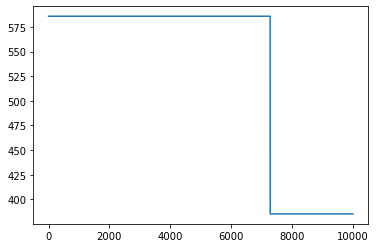

In [39]:

print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 3
fitness = cost_function


num_particles = 1000
max_iter = 10000

print("Setting num_particles = " + str(num_particles))
print("Setting max_iter = " + str(max_iter))
print("\nStarting PSO algorithm\n")


best_position,best_pos_hist, best_fitnessVal_hist = Particle.pso(fitness, Xa, y, max_iter, num_particles, dim, -50.0, 50.0)

print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position, Xa, y)
print("fitness of best solution = %.6f" % fitnessVal)

print("\nEnd particle swarm for rastrigin function\n")

import matplotlib.pyplot as plt
lists=sorted(best_fitnessVal_hist.items())
x_hist,y_hist=zip(*lists)
plt.figure(figsize=(6,4))
plt.plot(x_hist,y_hist)

In [40]:
beta_sol_pso = best_position
beta_sol_pso

[-5.2709165613223234, 1.85243262034993, 0.6957691062207232]

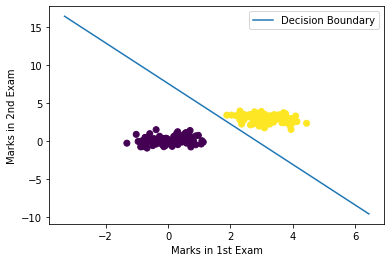

In [41]:

x_values = [np.min(Xa[:, 1] - 2), np.max(Xa[:, 1] + 2)]
y_values =  -(beta_sol_pso[0] + np.dot(beta_sol_pso[1], x_values)) / beta_sol_pso[2]

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values, c=y)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()


In [42]:
accuracy = np.mean(np.round(predict(beta_sol_pso,Xa)) == y.T[0])
accuracy

1.0